Netflix Stock Analysis - [2018/2022]

In [1]:
#import library
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
#Extracting the data from rawfiles
NFLX=pd.read_csv('https://raw.githubusercontent.com/Subhajeet-Das/Netfilix-Stock-Price-prediction/main/NFLX.csv')
NFLX


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [3]:
#checking the data if missing or null
print(NFLX.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [4]:
#describing the data through vary medium
print(NFLX.describe())


              Open         High          Low        Close    Adj Close  \
count  1009.000000  1009.000000  1009.000000  1009.000000  1009.000000   
mean    419.059673   425.320703   412.374044   419.000733   419.000733   
std     108.537532   109.262960   107.555867   108.289999   108.289999   
min     233.919998   250.649994   231.229996   233.880005   233.880005   
25%     331.489990   336.299988   326.000000   331.619995   331.619995   
50%     377.769989   383.010010   370.880005   378.670013   378.670013   
75%     509.130005   515.630005   502.529999   509.079987   509.079987   
max     692.349976   700.989990   686.090027   691.690002   691.690002   

             Volume  
count  1.009000e+03  
mean   7.570685e+06  
std    5.465535e+06  
min    1.144000e+06  
25%    4.091900e+06  
50%    5.934500e+06  
75%    9.322400e+06  
max    5.890430e+07  


In [5]:
# Setting the figure size for Seaborn plots
sns.set(rc={'figure.figsize':(10,5)})

In [6]:
#changing the deafult index into date
NFLX['Date']=pd.to_datetime(NFLX['Date'])
NFLX=NFLX.set_index('Date')
NFLX.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


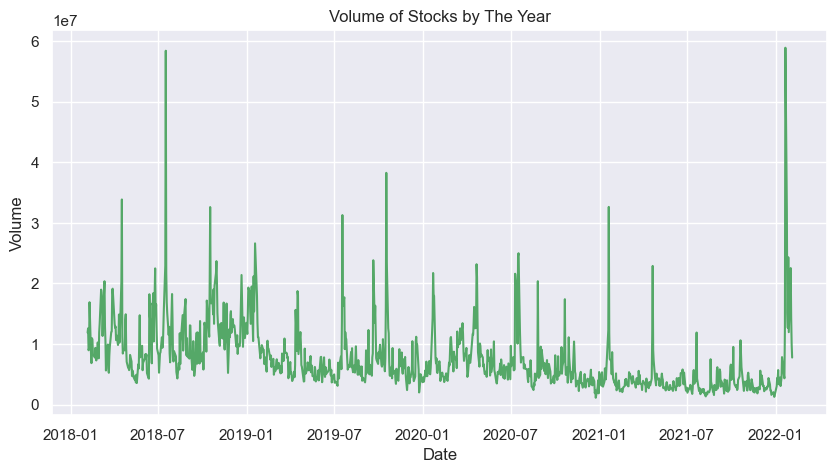

In [7]:
#visulaizing the data
sns.lineplot(x=NFLX.index,y='Volume',data=NFLX,color='g')
plt.title('Volume of Stocks by The Year')
plt.show()

In [8]:
#cloning the upper data into diff visual library
fig=px.line(data_frame=NFLX,x=NFLX.index,y='Volume',title='Volume of Stocks by The Year')
fig.show()


Text(0, 0.5, 'Price')

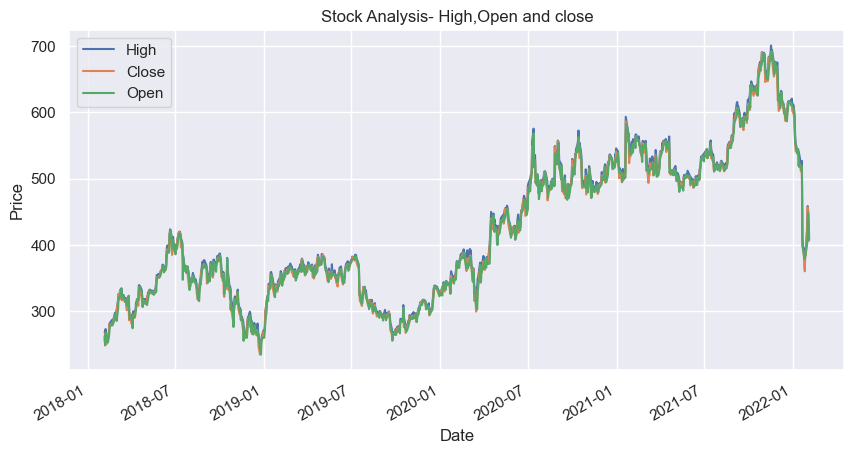

In [9]:
#Creating the plot- High,Open and close
NFLX.plot(y=['High','Close','Open'],title='Stock Analysis- High,Open and close')
plt.xlabel('Date')
plt.ylabel('Price')

In [10]:
#cloning the upper data into diff plot
high_trace=go.Scatter(x=NFLX.index,y=NFLX['High'],mode='lines',name='High')
Close_trace=go.Scatter(x=NFLX.index,y=NFLX['Close'],mode='lines',name='Close')
Open_trace=go.Scatter(x=NFLX.index,y=NFLX['Open'],mode='lines',name='Open')

# Create the layout
layout=go.Layout(title='Stock Analysis- High,Open and Close',
                 xaxis=dict(title='Date'),
                 yaxis=dict(title='Price'))

#displaying the plot
fig=go.Figure(data=[high_trace,Close_trace,Open_trace],layout=layout)
fig.show()


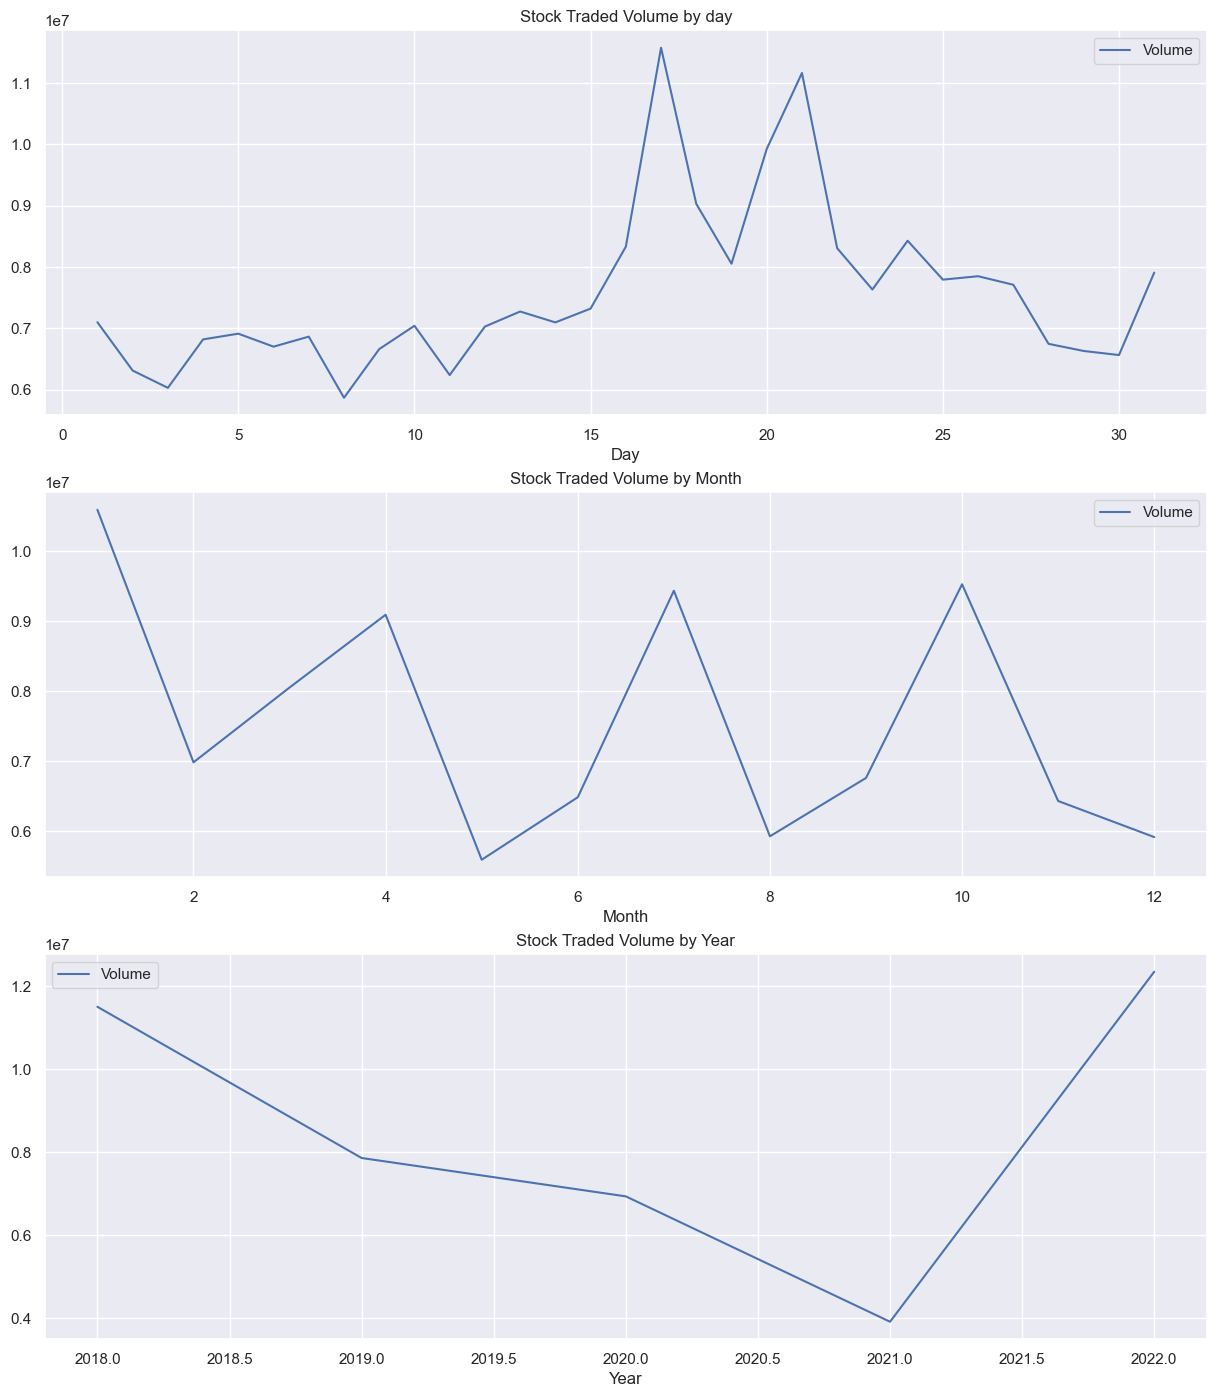

In [33]:
#Visualizing the 3 data using subplot
fig,(ax1,ax2,ax3)=plt.subplots(3,figsize=(15,17))  

#setting the parameter - groupby - for day
NFLX.groupby(NFLX.index.day).mean().plot(y='Volume',ax=ax1,xlabel='Day',title='Stock Traded Volume by day' )

#for month
NFLX.groupby(NFLX.index.month).mean().plot(y='Volume',ax=ax2,xlabel='Month',title='Stock Traded Volume by Month')

#for year
NFLX.groupby(NFLX.index.year).mean().plot(y='Volume',ax=ax3,xlabel='Year',title='Stock Traded Volume by Year')
plt.show()

In [37]:
#dates with high stock price
high_stock=NFLX.sort_values(by=['High'],ascending=False)
high_stock= high_stock.head()
high_stock['High']


Date
2021-11-17    700.989990
2021-11-19    694.159973
2021-11-18    691.739990
2021-10-29    690.969971
2021-11-01    689.969971
Name: High, dtype: float64

In [46]:
#Visualizing the top 5 high stock price by dates
fig=px.bar(x=high_stock.index,title='Top 5 Highest Stocks Price via Dates')

#upadating the data
fig.update_layout(xaxis_title='Stock Price',
                  yaxis_title='Counts')
fig.show()

In [50]:
#Top 5 dates with lowest Stock Price
Low_Stock=NFLX.sort_values(by=['Low'],ascending=True)
Low_Stock=Low_Stock.head()
Low_Stock['Low']

Date
2018-12-26    231.229996
2018-12-24    233.679993
2018-02-09    236.110001
2018-12-27    240.100006
2018-12-21    241.289993
Name: Low, dtype: float64

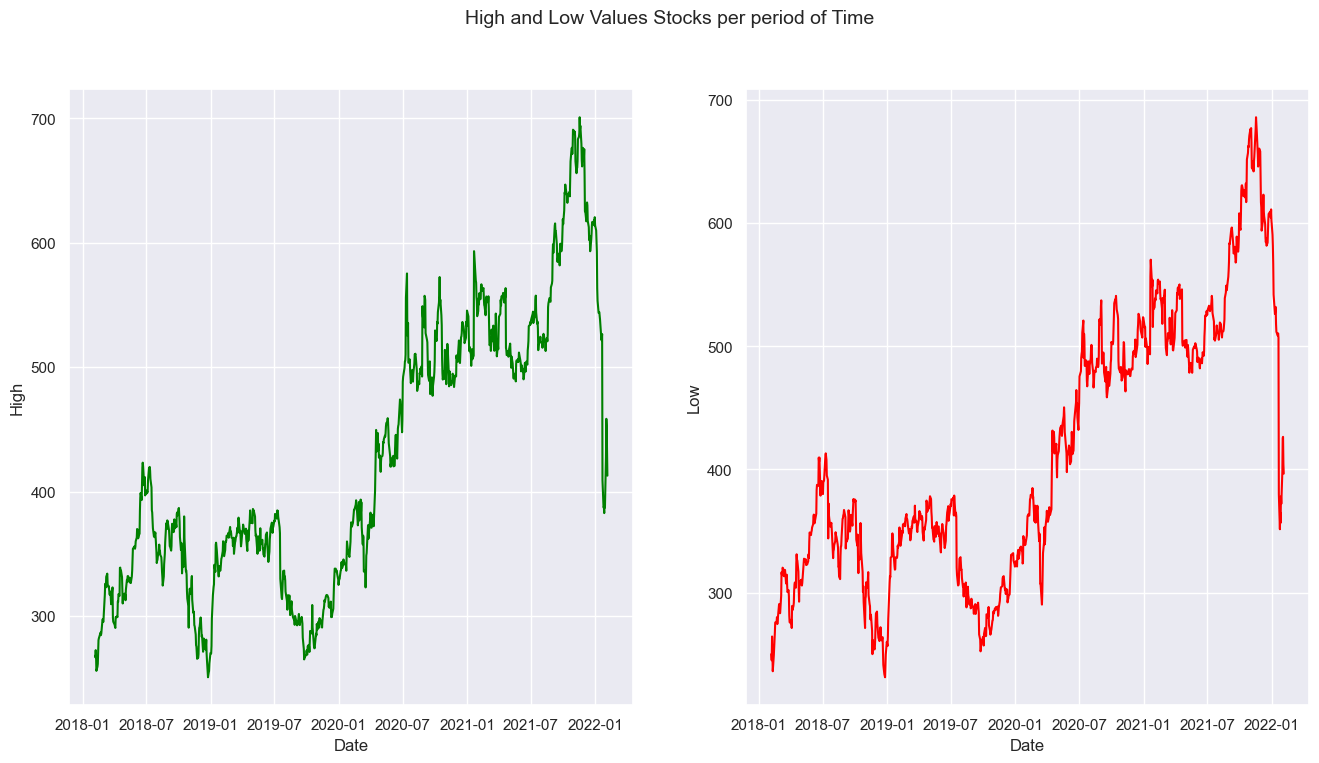

In [64]:
#High and Low Values Stocks per period of Time
fig,axes=plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(16,8))
fig.suptitle('High and Low Values Stocks per period of Time',fontsize=14)

#High Stocks
sns.lineplot(ax=axes[0],y=NFLX['High'],x=NFLX.index,color='green')

#Low Stocks
sns.lineplot(ax=axes[1],y=NFLX['Low'],x=NFLX.index,color='red')
plt.show()